In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential

In [ ]:
import tensorflow as tf
print(tf.__version__)  # TensorFlow version


2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


ANSWER 1 A

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/IMDB Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


B

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Convert reviews to bag-of-words representation
X = vectorizer.fit_transform(data['review'])

# Check the shape of the resulting matrix
print(X.shape)


(50000, 101895)


C

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
y = data['sentiment']  # Assuming sentiment is the target column

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


D

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model
logistic_accuracy = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8926


In [ ]:
logistic_model = LogisticRegression(max_iter=200)  # Increase max_iter to 200 or more
logistic_model.fit(X_train, y_train)
logistic_accuracy = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")


Logistic Regression Accuracy: 0.8867


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
nb_accuracy = nb_model.score(X_test, y_test)
print(f"Naive Bayes Accuracy: {nb_accuracy}")


Naive Bayes Accuracy: 0.8487


E

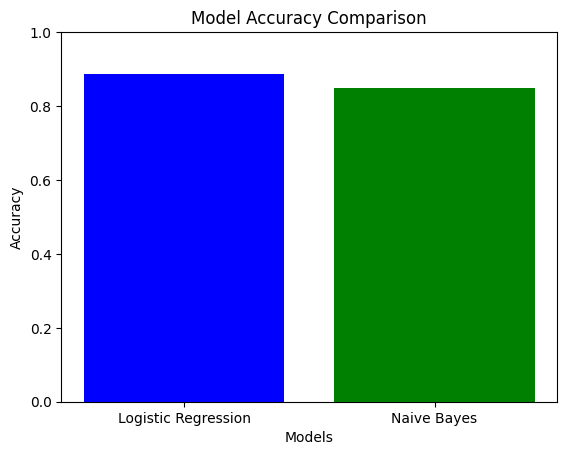

In [ ]:
import matplotlib.pyplot as plt

# Accuracies
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logistic_accuracy, nb_accuracy]

# Plot
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.show()


ANSWER 2 A

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the reviews to TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(data['review'])

# Check the shape of the resulting matrix
print(X_tfidf.shape)


(50000, 101895)


B

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
y = data['sentiment']  # Assuming 'sentiment' is the target column

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


C

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression on TF-IDF data
logistic_model_tfidf = LogisticRegression(max_iter=200)
logistic_model_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the model
logistic_accuracy_tfidf = logistic_model_tfidf.score(X_test_tfidf, y_test)
print(f"Logistic Regression (TF-IDF) Accuracy: {logistic_accuracy_tfidf}")


Logistic Regression (TF-IDF) Accuracy: 0.8997


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes on TF-IDF data
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the model
nb_accuracy_tfidf = nb_model_tfidf.score(X_test_tfidf, y_test)
print(f"Naive Bayes (TF-IDF) Accuracy: {nb_accuracy_tfidf}")


Naive Bayes (TF-IDF) Accuracy: 0.8638


D

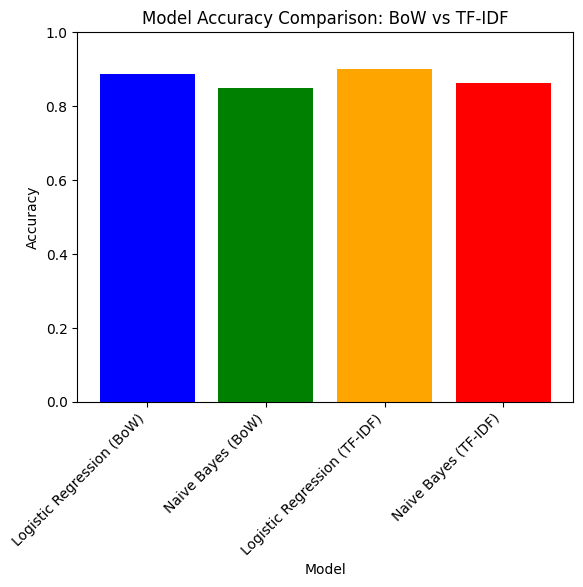

In [ ]:
import matplotlib.pyplot as plt

# Assume bag-of-words model accuracies are stored in 'logistic_accuracy' and 'nb_accuracy'
# These should be the accuracies you obtained from the bag-of-words model

accuracies = [logistic_accuracy, nb_accuracy, logistic_accuracy_tfidf, nb_accuracy_tfidf]
models = ['Logistic Regression (BoW)', 'Naive Bayes (BoW)', 'Logistic Regression (TF-IDF)', 'Naive Bayes (TF-IDF)']

# Create a bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title("Model Accuracy Comparison: BoW vs TF-IDF")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.show()


ANSWER 3

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load your dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

# Assuming the dataset has 'review' and 'sentiment' columns
reviews = data['review'].values
sentiments = data['sentiment'].values

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Pad sequences to ensure uniform input length
max_sequence_length = 100  # You can adjust this based on your dataset
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = np.array([1 if sentiment == 'positive' else 0 for sentiment in sentiments])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Load GloVe embeddings
embedding_index = {}
with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create an embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=len(word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_sequence_length,
              trainable=False),
    SimpleRNN(10),  # Single RNN layer with 10 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          12425300  
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                1110      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 12426421 (47.40 MB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 12425300 (47.40 MB)
_________________________________________________________________


Batch size 64

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
625/625 [==============================] - 11s 16ms/step - loss: 0.6690 - accuracy: 0.5956 - val_loss: 0.6113 - val_accuracy: 0.6789
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 0.6470 - accuracy: 0.6199 - val_loss: 0.6688 - val_accuracy: 0.5836
Epoch 3/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6603 - accuracy: 0.5957 - val_loss: 0.6541 - val_accuracy: 0.6123
Epoch 4/50
625/625 [==============================] - 9s 15ms/step - loss: 0.6332 - accuracy: 0.6403 - val_loss: 0.6141 - val_accuracy: 0.6642
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 0.6327 - accuracy: 0.6428 - val_loss: 0.6180 - val_accuracy: 0.6502
Epoch 6/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6074 - accuracy: 0.6760 - val_loss: 0.5713 - val_accuracy: 0.7167
Epoch 7/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6575 - accuracy: 0.6094 - val_loss: 0.6236 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


313/313 [==============================] - 2s 6ms/step - loss: 0.6324 - accuracy: 0.6474
Test Accuracy: 0.6474


Batch size changed to 32

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 22s 17ms/step - loss: 0.6048 - accuracy: 0.6743 - val_loss: 0.6007 - val_accuracy: 0.6788
Epoch 2/50
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6177 - accuracy: 0.6617 - val_loss: 0.6209 - val_accuracy: 0.6548
Epoch 3/50
1250/1250 [==============================] - 21s 17ms/step - loss: 0.5963 - accuracy: 0.6867 - val_loss: 0.5699 - val_accuracy: 0.7166
Epoch 4/50
1250/1250 [==============================] - 21s 16ms/step - loss: 0.5689 - accuracy: 0.7089 - val_loss: 0.5853 - val_accuracy: 0.7011
Epoch 5/50
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6232 - accuracy: 0.6516 - val_loss: 0.6550 - val_accuracy: 0.6206
Epoch 6/50
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6593 - accuracy: 0.6023 - val_loss: 0.6031 - val_accuracy: 0.6782
Epoch 7/50
1250/1250 [==============================] - 19s 16ms/step - loss: 0.6009 - accuracy: 0.6720 - val_loss: 0.5828 -

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 2s 8ms/step - loss: 0.7342 - accuracy: 0.6195
Test Accuracy: 0.6195


Observation : Decreasing the batch size to 32, reduced accuracy.

Batch size increased to 128

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
313/313 [==============================] - 6s 19ms/step - loss: 0.6168 - accuracy: 0.6831 - val_loss: 0.5812 - val_accuracy: 0.7172
Epoch 2/50
313/313 [==============================] - 6s 20ms/step - loss: 0.5805 - accuracy: 0.7002 - val_loss: 0.5728 - val_accuracy: 0.7127
Epoch 3/50
313/313 [==============================] - 6s 19ms/step - loss: 0.5706 - accuracy: 0.7053 - val_loss: 0.5820 - val_accuracy: 0.7047
Epoch 4/50
313/313 [==============================] - 6s 19ms/step - loss: 0.5768 - accuracy: 0.7161 - val_loss: 0.5723 - val_accuracy: 0.7226
Epoch 5/50
313/313 [==============================] - 6s 19ms/step - loss: 0.5768 - accuracy: 0.7059 - val_loss: 0.5719 - val_accuracy: 0.7074
Epoch 6/50
313/313 [==============================] - 6s 20ms/step - loss: 0.5627 - accuracy: 0.7156 - val_loss: 0.5607 - val_accuracy: 0.7143
Epoch 7/50
313/313 [==============================] - 6s 19ms/step - loss: 0.5659 - accuracy: 0.7080 - val_loss: 0.5818 - val_accuracy: 0.6908

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 2s 6ms/step - loss: 0.5531 - accuracy: 0.7346
Test Accuracy: 0.7346


Observation : After increasing the batch size to 128, accuracy improved

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=124, validation_data=(X_test, y_test))

Epoch 1/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8954 - loss: 0.2957 - val_accuracy: 0.7132 - val_loss: 0.8536
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8953 - loss: 0.2965 - val_accuracy: 0.7120 - val_loss: 0.8674
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8979 - loss: 0.2887 - val_accuracy: 0.7114 - val_loss: 0.8837
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8979 - loss: 0.2898 - val_accuracy: 0.7138 - val_loss: 0.9210
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8959 - loss: 0.2937 - val_accuracy: 0.7116 - val_loss: 0.9545
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8878 - loss: 0.3007 - val_accuracy: 0.7108 - val_loss: 0.9079
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8948 - loss: 0.2973 - val_accuracy: 0.7113 - val_loss: 0.9128
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8948 - loss: 0.2916 - val_accurac

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential([
    Embedding(input_dim=len(word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_sequence_length,
              trainable=True),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_sequence_length))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          12425300  
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 10)                100010    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12525321 (47.78 MB)
Trainable params: 12525321 (47.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))